In [1]:
# imports 

import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display,clear_output
import glob

import scipy as scipy
import scipy.signal as signal
from scipy.interpolate import interp1d
from scipy.optimize import leastsq
from sympy import pprint
import sympy 
from scipy.optimize import curve_fit
import peakutils


import mpld3
mpld3.enable_notebook()

import warnings
warnings.filterwarnings('ignore')



In [2]:
# XML reader
class XML2DataFrame:

    def __init__(self, xml_data):
        self.root = ET.XML(xml_data)

    def parse_root(self, root):
        return [self.parse_element(child) for child in iter(root)]

    def parse_element(self, element, parsed=None):
        if parsed is None:
            parsed = dict()
        for key in element.keys():
            parsed[element.tag +"_"+ key] = element.attrib.get(key)
#         display(element.tag)
        if element.text:
            parsed[  element.tag ] = element.text
        for child in list(element):
            self.parse_element(child, parsed)
        return parsed

    def process_data(self):
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)




In [6]:
#
recordings = [file for file in  sorted(glob.glob('./Data/*.xml'))][::-1]

print('number of files: %s (%s subjects)'%(len(recordings),len(recordings)/8))
files_dropdown=widgets.Dropdown(
    options=recordings,
    description='recording:',
    disabled=False, layout=widgets.Layout(width='50%'))
display(files_dropdown)






number of files: 2 (0.25 subjects)


Dropdown(description='recording:', layout=Layout(width='50%'), options=('./Data/vr_data_20190115T071430.xml', './Data/vr_data_20190115T065902.xml'), value='./Data/vr_data_20190115T071430.xml')

# Load individual recording

In [7]:
# Loading vr data
def LOAD(dataFile):


    xml2df = XML2DataFrame(open( dataFile).read())
    df = xml2df.process_data()

    df=df.drop(['frame'], axis=1)
    df=df.apply(pd.to_numeric, errors='ignore',downcast='integer')

    return df

df=LOAD(files_dropdown.value)
# print(df.info())
# display(df.columns.values)
display(df.head())

,Heading_Value_X,Heading_Value_Y,Participant_Age,Participant_Gender,Participant_Name
0,NaN,NaN,NaN,NaN,P
1,1209.094,361.3125,NaN,NaN,P
2,1209.094,361.3125,NaN,NaN,P
3,1209.094,361.3125,NaN,NaN,P
4,1209.094,361.3125,NaN,NaN,P


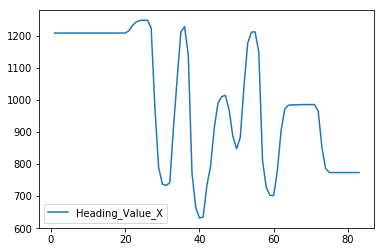

In [8]:
df.plot(y='Heading_Value_X')